<img align=center src="https://rhyme.com/assets/img/logo-dark.png"></img>
<h2 align=center> Topic Classification with Tensorflow and Keras</h2>

## Task 1: Project Overview and Import Modules

In [1]:
%tensorflow_version 2.x 
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)
import tensorflow as tf
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.preprocessing.text import Tokenizer

print('Tensorflow version:', tf.__version__)

TensorFlow 2.x selected.
Tensorflow version: 2.2.0-rc1


## Task 2: Load the Reuters Dataset

In [2]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000, test_split=0.2)

2113536/2110848 [==============================] - 0s 0us/step


In [3]:
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

8982 train sequences
2246 test sequences


In [4]:
num_classes = np.max(y_train) + 1
print(num_classes, 'classes')

46 classes


## Task 3: Vectorize Sequence Data and One-hot Encode Class Labels

In [5]:
print('Vectorizing sequence data...')
tokenizer = Tokenizer(num_words=10000)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Vectorizing sequence data...
x_train shape: (8982, 10000)
x_test shape: (2246, 10000)


In [6]:
print('Convert class vector to binary class matrix for use with categorical_crossentropy')
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

Convert class vector to binary class matrix for use with categorical_crossentropy
y_train shape: (8982, 46)
y_test shape: (2246, 46)


## Task 4: Build Multilayer Perceptron Model

In [0]:
model = Sequential()
model.add(Dense(512, input_shape=(10000,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               5120512   
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 46)                23598     
_________________________________________________________________
activation_1 (Activation)    (None, 46)                0         
Total params: 5,144,110
Trainable params: 5,144,110
Non-trainable params: 0
_________________________________________________________________


## Task 5: Train Model

In [9]:
%%time
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss',patience=3, verbose=1, mode='min', baseline=None, restore_best_weights=False)
callbacks = [early_stopping]

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

CPU times: user 15.1 ms, sys: 774 µs, total: 15.9 ms
Wall time: 17.3 ms


In [10]:
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.1,
                    callbacks=callbacks)

Epoch 1/20
253/253 [==============================] - 8s 32ms/step - loss: 1.2965 - accuracy: 0.7223 - val_loss: 0.9612 - val_accuracy: 0.8031
Epoch 2/20
253/253 [==============================] - 8s 32ms/step - loss: 0.4942 - accuracy: 0.8892 - val_loss: 0.8524 - val_accuracy: 0.8165
Epoch 3/20
253/253 [==============================] - 8s 32ms/step - loss: 0.2826 - accuracy: 0.9395 - val_loss: 0.9127 - val_accuracy: 0.8120
Epoch 4/20
253/253 [==============================] - 8s 31ms/step - loss: 0.2133 - accuracy: 0.9478 - val_loss: 0.9505 - val_accuracy: 0.8042
Epoch 5/20
253/253 [==============================] - 8s 31ms/step - loss: 0.1987 - accuracy: 0.9510 - val_loss: 0.9080 - val_accuracy: 0.8065
Epoch 00005: early stopping


## Task 6: Evaluate Model on Test Data

In [32]:
score = model.evaluate(x_test, y_test, batch_size=32, verbose=1)
print('Test loss: {:4f}\nTest Accuracy: {:4f}'.format(score[0], score[1]))

71/71 [==============================] - 0s 3ms/step - loss: 1.0031 - accuracy: 0.8010
Test loss: 1.003070
Test Accuracy: 0.800979


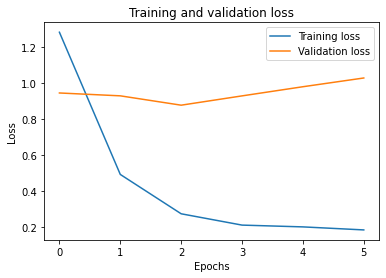

In [33]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

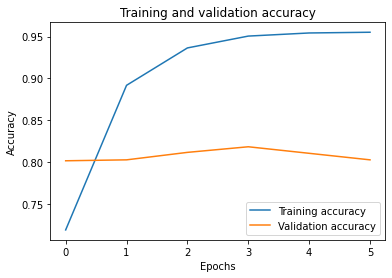

In [34]:
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()